# Impact of government measures on COVID cases using regression.

We used Regression discontinuity design (RDD) to estimate the effect of the following events in Quebec:

- The 20/3/2020 lockdown
- The reopening of schools on 31/8/2020
- The 25/12/2020 lockdown

Regression discontinuity design (RDD) is a method used to identify the effect of a change implemented at a cutoff point.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
sns.set()

df = pd.read_csv('data/COVID19_Qc_RapportINSPQ_HistoVigie.csv')
df = df.drop(labels=0, axis=0)

"DONNÉES QUÉBEC." COVID-19: Portrait quotidien des cas confirmés, Gouvernement du Québec, 2023, www.donneesquebec.ca/recherche/dataset/covid-19-portrait-quotidien-des-cas-confirmes.

In [3]:
df

,Date,Nb_Cas_Cumulatif,Nb_Nvx_Cas,Nb_Deces_Cumulatif_Total,Nb_Nvx_Deces_Total
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
5,2020-01-27,0,0,0,0
...,...,...,...,...,...
1210,2023-05-16,1343400,256,17864,1
1211,2023-05-17,1343625,225,17868,4
1212,2023-05-18,1343811,186,17870,2
1213,2023-05-19,1344024,213,17873,3


## 1st Event: Lockdown - March 20, 2020

The government of Quebec decided to establish a Lockdown on March 20th, 2020 trying to face the COVID cases in the province. We tried different regresstions to estmiate the effect of the lockdown. We wanted the most accurate model possible.

### Model 1 - 2 separate regressions 

At first, we did 2 separate regressions: one before the lockdown and one after it. It was a fine model, but we can not establish the real impact of the lockdown.

In [9]:
data = df.copy()

# Restrict data to 60 days before and after reopening of schools, August 31, 2020
data['days_from_lockdown'] = pd.to_datetime(data['Date'])
target_date = pd.to_datetime('2020-03-20')
date_before = target_date - pd.DateOffset(days=60)
date_after = target_date + pd.DateOffset(days=60)
data = data[(data['days_from_lockdown'] >= date_before) & (data['days_from_lockdown'] <= date_after)].copy()

# Create 'Cutoff' column indicating if days are after the lockdown
cutoff_date = pd.Timestamp('2020-03-20')
data['days_from_lockdown'] = (data['days_from_lockdown'] - cutoff_date).dt.days

# split the dataset into pre- and post-cutoff points
pre_cutoff = data[data['days_from_lockdown'] < 0]
post_cutoff = data[data['days_from_lockdown'] >= 0]

X_pre = pre_cutoff[['days_from_lockdown']]
X_post = post_cutoff[['days_from_lockdown']]

y_pre = pre_cutoff['Nb_Nvx_Cas']
y_post = post_cutoff['Nb_Nvx_Cas']

model_pre = sm.OLS(y_pre, sm.add_constant(X_pre)).fit()
model_post = sm.OLS(y_post, sm.add_constant(X_post)).fit()

In [10]:
model_pre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     6.732
Date:                Fri, 26 May 2023   Prob (F-statistic):             0.0121
Time:                        22:48:05   Log-Likelihood:                -183.31
No. Observations:                  57   AIC:                             370.6
Df Residuals:                      55   BIC:                             374.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.0182      1.648      3.044      0.004       1.715       8.322
days_from_lockdown     0.1283      0.049      2.595      0.012       0.029       0.227
==============================================================================
Omnibus:                      115.581   Durbin-Watson:                   0.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4733.965
Skew:                           6.373   Prob(JB):                         0.00
Kurtosis:                      45.788   Cond. No.                         67.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
model_post.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     22.78
Date:                Fri, 26 May 2023   Prob (F-statistic):           1.24e-05
Time:                        22:48:06   Log-Likelihood:                -399.03
No. Observations:                  61   AIC:                             802.1
Df Residuals:                      59   BIC:                             806.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                464.3548     43.150     10.761      0.000     378.012     550.697
days_from_lockdown     5.9204      1.240      4.773      0.000       3.438       8.403
==============================================================================
Omnibus:                        0.065   Durbin-Watson:                   0.450
Prob(Omnibus):                  0.968   Jarque-Bera (JB):                0.203
Skew:                          -0.067   Prob(JB):                        0.903
Kurtosis:                       2.751   Cond. No.                         68.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

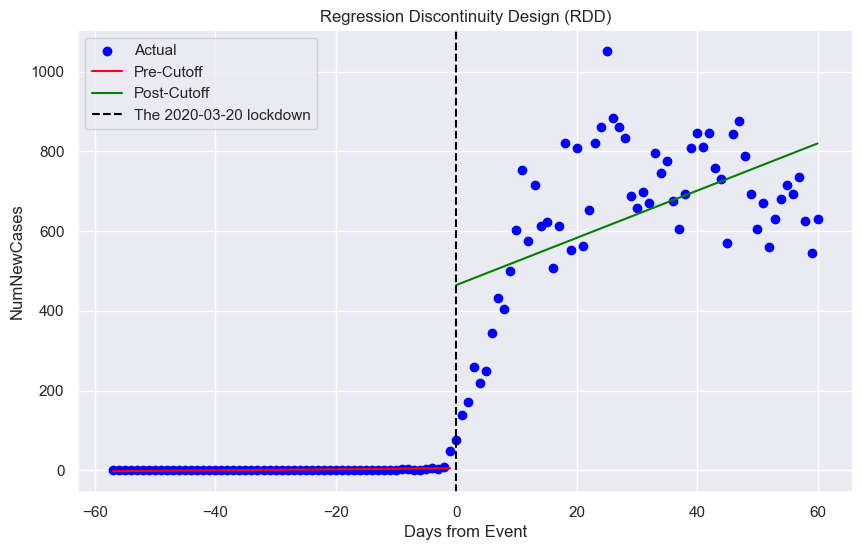

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(data['days_from_lockdown'], data['Nb_Nvx_Cas'], color='blue', label='Actual')
plt.plot(data[data['days_from_lockdown'] < 0]['days_from_lockdown'], model_pre.predict(), color='red', label='Pre-Cutoff')
plt.plot(data[data['days_from_lockdown'] >= 0]['days_from_lockdown'], model_post.predict(), color='green', label='Post-Cutoff')
plt.axvline(x=0, color='black', linestyle='--', label='The 2020-03-20 lockdown')
plt.xlabel('Days from Event')
plt.ylabel('NumNewCases')
plt.title('Regression Discontinuity Design (RDD)')
plt.legend()
plt.grid(True)
plt.show()

### Model 2 - Polynomial RDD regression

We then tried a polynomial RDD regression. We think this model overfit the data.

In [13]:
data = df.copy()

# Restrict data to 60 days before and after reopening of schools, August 31, 2020
data['days_from_lockdown'] = pd.to_datetime(data['Date'])
target_date = pd.to_datetime('2020-03-20')
date_before = target_date - pd.DateOffset(days=60)
date_after = target_date + pd.DateOffset(days=60)
data = data[(data['days_from_lockdown'] >= date_before) & (data['days_from_lockdown'] <= date_after)].copy()

# Create 'Cutoff' column indicating if days are after the lockdown
cutoff_date = pd.Timestamp('2020-03-20')
data['days_from_lockdown'] = (data['days_from_lockdown'] - cutoff_date).dt.days
data['Cutoff'] = (data['days_from_lockdown'] >= 0).astype(int)

# Create 'Interaction' column that's the product of 'days_from_lockdown' and 'Cutoff'
data['Interaction'] = data['days_from_lockdown'] * data['Cutoff']

# Option of having a 2nd degree function (using PolynomialFeatures or manually squaring features)
# degree = 2
# poly = PolynomialFeatures(degree=degree)
# X_poly = poly.fit_transform(data[['Cutoff', 'Interaction']])

X = data[["days_from_lockdown",'Cutoff', 'Interaction']]
X_poly = X.copy()
for feature in X.columns:
    X_poly[feature + '_squared'] = X[feature] ** 2
#     X_poly[feature + '_cubic'] = X[feature] ** 3

model = sm.OLS(data['Nb_Nvx_Cas'], sm.add_constant(X_poly)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     463.1
Date:                Fri, 26 May 2023   Prob (F-statistic):           4.67e-73
Time:                        22:48:10   Log-Likelihood:                -677.27
No. Observations:                 118   AIC:                             1367.
Df Residuals:                     112   BIC:                             1383.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         10.7146     31.795      0.337      0.737     -52.282      73.711
days_from_lockdown             0.7076      2.529      0.280      0.780      -4.304       5.719
Cutoff                        87.1361     21.421      4.068      0.000      44.693     129.580
Interaction                   33.6231      3.361     10.005      0.000      26.964      40.282
days_from_lockdown_squared     0.0100      0.042      0.236      0.814      -0.074       0.094
Cutoff_squared                87.1361     21.421      4.068      0.000      44.693     129.580
Interaction_squared           -0.4835      0.055     -8.741      0.000      -0.593      -0.374
==============================================================================
Omnibus:                       18.897   Durbin-Watson:                   1.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.016
Skew:                           0.581   Prob(JB):                     2.77e-10
Kurtosis:                       5.757   Cond. No.                     7.76e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.62e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

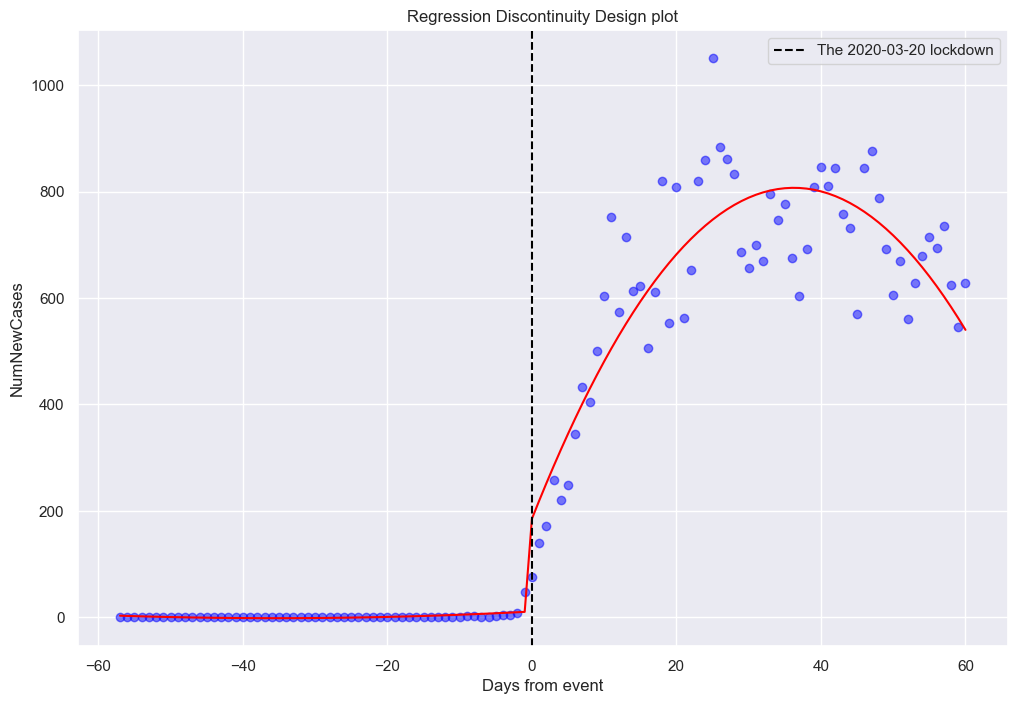

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(data['days_from_lockdown'], data['Nb_Nvx_Cas'], color='blue', alpha=0.5)
plt.plot(data['days_from_lockdown'], model.predict(), color='red')
plt.axvline(x=0, color='black', linestyle='--', label='The 2020-03-20 lockdown')  # show lockdown date
plt.xlabel('Days from event')
plt.ylabel('NumNewCases')
plt.title('Regression Discontinuity Design plot')
plt.legend()
plt.show()

### Model 3 - Regular regression

We did a regular regression. This is not a fine model since it does not fit the data well and we can not see the impact of the event.

In [19]:
data = df.copy()

# Restrict data to 60 days before and after reopening of schools, August 31, 2020
data['days_from_lockdown'] = pd.to_datetime(data['Date'])
target_date = pd.to_datetime('2020-03-20')
date_before = target_date - pd.DateOffset(days=60)
date_after = target_date + pd.DateOffset(days=60)
data = data[(data['days_from_lockdown'] >= date_before) & (data['days_from_lockdown'] <= date_after)].copy()

# Create 'Cutoff' column indicating if days are after the lockdown
cutoff_date = pd.Timestamp('2020-03-20')
data['days_from_lockdown'] = (data['days_from_lockdown'] - cutoff_date).dt.days

X = data[['days_from_lockdown']]
y = data['Nb_Nvx_Cas']

model = sm.OLS(y, sm.add_constant(X)).fit()

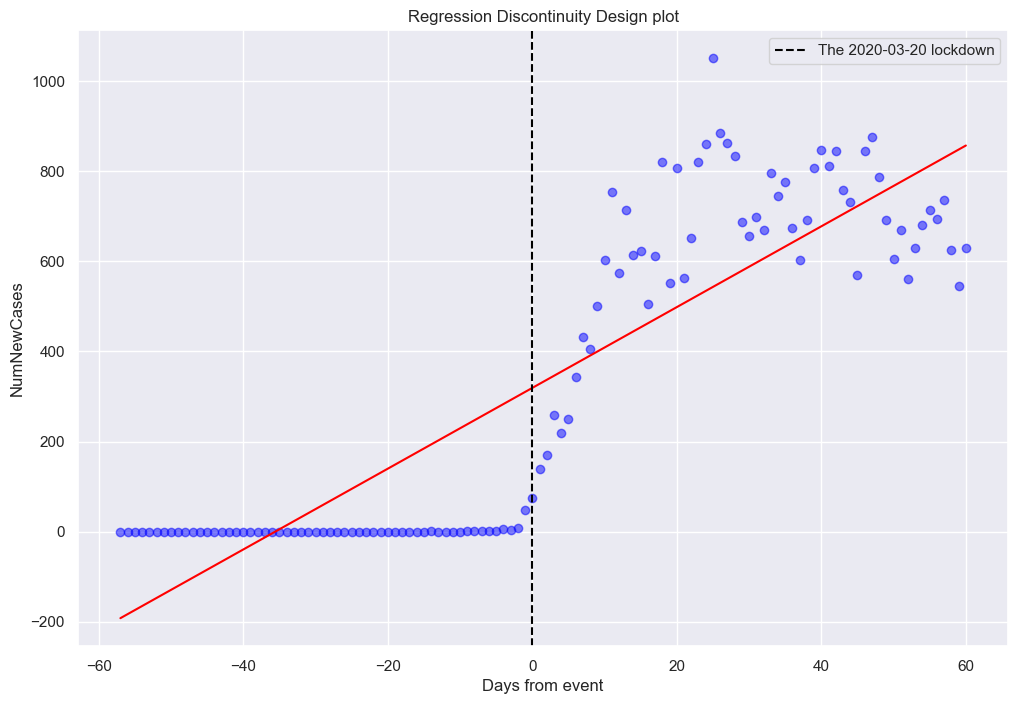

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(data['days_from_lockdown'], data['Nb_Nvx_Cas'], color='blue', alpha=0.5)
plt.plot(data['days_from_lockdown'], model.predict(), color='red') 
plt.xlabel('Days from event')
plt.ylabel('NumNewCases')
plt.title('Regression Discontinuity Design plot')
plt.axvline(x=0, color='black', linestyle='--', label='The 2020-03-20 lockdown')
plt.legend()
plt.show()

### Model 3.1 - Zero Inflated Poisson 

We tried a zero inflated Poisson, but the results were similar to a simple regression.

In [21]:
data = df.copy()

data['Date'] = pd.to_datetime(data['Date'])

target_date = pd.to_datetime('2020-03-20')

date_before = target_date - pd.DateOffset(days=60)
date_after = target_date + pd.DateOffset(days=60)

# Filter the DataFrame based on the date range
data = data[(data['Date'] >= date_before) & (data['Date'] <= date_after)].copy()

cutoff_date = pd.Timestamp('2020-03-20')
data['Date'] = (data['Date'] - cutoff_date).dt.days
data['Cutoff'] = (data['Date'] >= 0).astype(int)
data['Interaction'] = data['Date'] * data['Cutoff']

x = data[['Date']]
X = sm.add_constant(x)
est = sm.ZeroInflatedPoisson(y,X).fit()
est.summary()

Optimization terminated successfully.
         Current function value: 45.158884
         Iterations: 11
         Function evaluations: 16
         Gradient evaluations: 16


D:\Program_files\anaconda3\envs\torchenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Program_files\anaconda3\envs\torchenv\lib\site-packages\statsmodels\discrete\count_model.py:531: RuntimeWarning: overflow encountered in square
  coeff**2)).sum() - (mu[nonzero_idx] * self.exog[nonzero_idx, i] *


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:              Nb_Nvx_Cas   No. Observations:                  118
Model:             ZeroInflatedPoisson   Df Residuals:                      116
Method:                            MLE   Df Model:                            1
Date:                 Fri, 26 May 2023   Pseudo R-squ.:                  0.3523
Time:                         22:51:36   Log-Likelihood:                -5328.7
converged:                        True   LL-Null:                       -8226.7
Covariance Type:             nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const    -0.4125      0.188     -2.194      0.028      -0.781      -0.044
const             5.7613      0.010    586.182      0.000       5.742       5.781
Date              0.0191      0.000     74.376      0.000       0.019       0.020
=================================================================================
"""

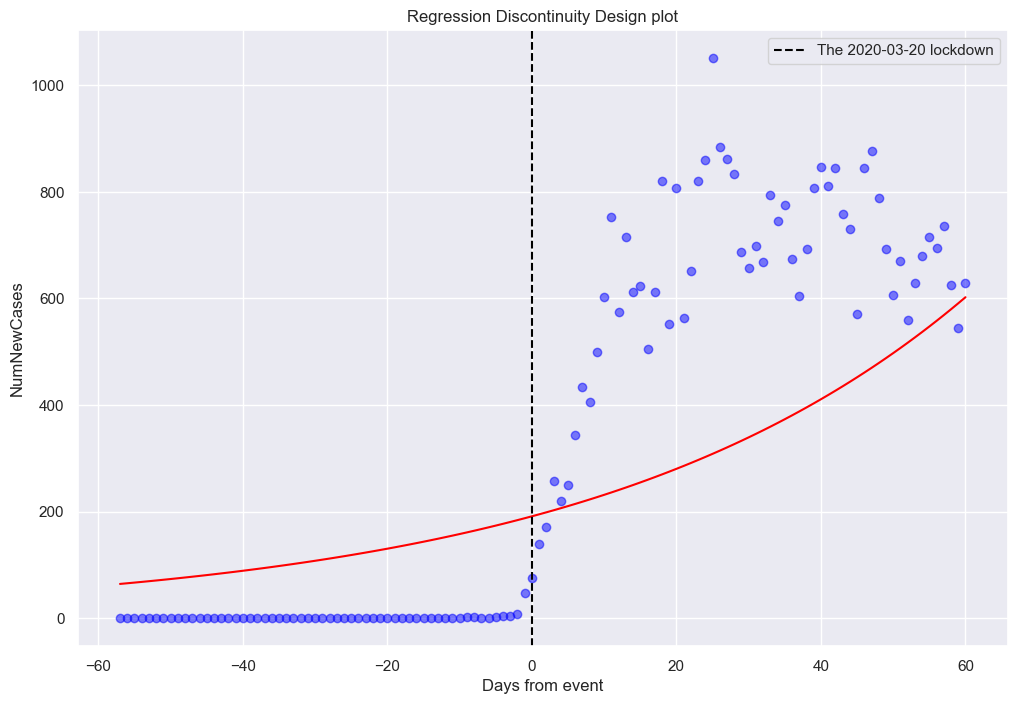

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(data['Date'], data['Nb_Nvx_Cas'], color='blue', alpha=0.5)
plt.plot(data['Date'], est.predict(), color='red')
plt.xlabel('Days from event')
plt.ylabel('NumNewCases')
plt.title('Regression Discontinuity Design plot')
plt.axvline(x=0, color='black', linestyle='--', label='The 2020-03-20 lockdown')
plt.legend()
plt.legend()
plt.show()

### Model 4 - RDD regression 

Finally, with a RDD regression model, we are able to estimate the events of the events.

In [23]:
data = df.copy()

# Restrict data to 60 days before and after reopening of schools, August 31, 2020
data['days_from_lockdown'] = pd.to_datetime(data['Date'])
target_date = pd.to_datetime('2020-03-20')
date_before = target_date - pd.DateOffset(days=60)
date_after = target_date + pd.DateOffset(days=60)
data = data[(data['days_from_lockdown'] >= date_before) & (data['days_from_lockdown'] <= date_after)].copy()

# Create 'Cutoff' column indicating if days are after the lockdown
cutoff_date = pd.Timestamp('2020-03-20')
data['days_from_lockdown'] = (data['days_from_lockdown'] - cutoff_date).dt.days
data['Cutoff'] = (data['days_from_lockdown'] >= 0).astype(int)

# Create 'Interaction' column that's the product of 'days_from_lockdown' and 'Cutoff'
data['Interaction'] = data['days_from_lockdown'] * data['Cutoff']

X = data[["days_from_lockdown",'Cutoff', 'Interaction']]
X_poly = X.copy()

model = sm.OLS(data['Nb_Nvx_Cas'], sm.add_constant(X_poly)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     282.0
Date:                Fri, 26 May 2023   Prob (F-statistic):           1.44e-52
Time:                        22:51:47   Log-Likelihood:                -733.04
No. Observations:                 118   AIC:                             1474.
Df Residuals:                     114   BIC:                             1485.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.0182     32.961      0.152      0.879     -60.277      70.313
days_from_lockdown     0.1283      0.989      0.130      0.897      -1.830       2.087
Cutoff               459.3367     45.290     10.142      0.000     369.617     549.056
Interaction            5.7921      1.332      4.348      0.000       3.153       8.431
==============================================================================
Omnibus:                       10.540   Durbin-Watson:                   0.560
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               26.373
Skew:                          -0.093   Prob(JB):                     1.88e-06
Kurtosis:                       5.309   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

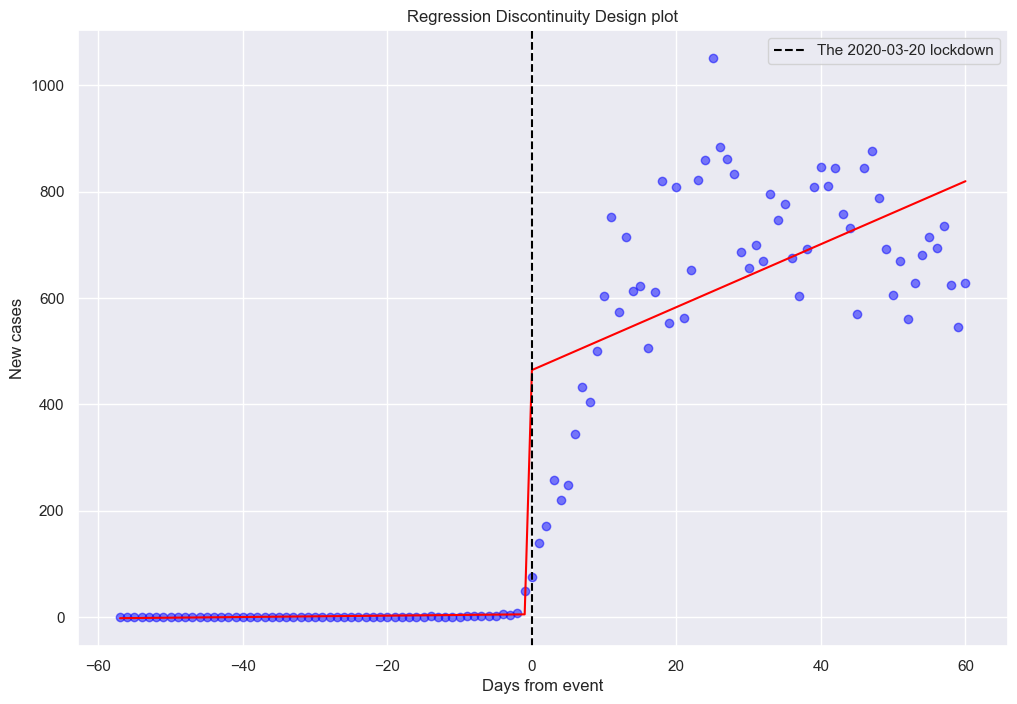

In [24]:
# Plot RDD
plt.figure(figsize=(12,8))
plt.scatter(data['days_from_lockdown'], data['Nb_Nvx_Cas'], color='blue', alpha=0.5)
plt.plot(data['days_from_lockdown'], model.predict(), color='red')
plt.axvline(x=0, color='black', linestyle='--', label='The 2020-03-20 lockdown')  # show lockdown date
plt.xlabel('Days from event')
plt.ylabel('New cases')
plt.title('Regression Discontinuity Design plot')
plt.grid(True)
plt.legend()
plt.show()

### Conclusion

The event we're studing in this question is the significance of the 20/3/2020 lockdown.We found using a 60 day period before and after the event was the most representative. We also use Regression Discontinuity Design (RDD) to model the results. In this case, a linear model may be appropriate for the relationship between the number of days from lockdown and the number of new COVID cases. Higher degrees aren't always better, as they can lead to overfitting.


#### Coefficients:




The const term represents the predicted number of new cases the day before of the lockdown. The intercept in this case is 5 new covid cases the day before the lockdown.

The coefficient for days_from_lockdown is 0.1283. It indicates the amount of new daily covid cases before the cutoff date.

The coefficient for Cutoff is 459.34. It represents the difference in the predicted number of new cases added after the first lockdown.

The coefficient for Interaction is 5.7921. It indicates the change in the slope after the cut off date. After the lockdown, the number of new covid cases are inscreasing by almost 6 per day.

The const and days_from_lockdown coefficient  has a p-value close to 1, suggesting that theyre not statistically relevant to the number of new covid cases before the lockdown. 

#### R-squared 

The R-squared value is 0.881, indicating that the model explains approx. 88% of the variance in the number of new Covid cases,which is relatively high.




In conclusion, the graphs and results suggest that the first lockdown implemented by the government of Quebec on 20/3/2020 had a minimal impact on the number of new cases.It seems that on the short term, the lockdown was able to slow down the spread of the virus and after the first 30 days post lockdown period, we already started seeing a drop of new daily covid cases in the province of Quebec.





## 2nd Event: Reopening of Schools

In [25]:
data = df.copy()

# Restrict data to 60 days before and after reopening of schools, August 31, 2020
data['days_from_lockdown'] = pd.to_datetime(data['Date'])
target_date = pd.to_datetime('2020-08-31')
date_before = target_date - pd.DateOffset(days=60)
date_after = target_date + pd.DateOffset(days=60)
data = data[(data['days_from_lockdown'] >= date_before) & (data['days_from_lockdown'] <= date_after)].copy()

# Create 'Cutoff' column indicating if days are after the lockdown
cutoff_date = pd.Timestamp('2020-08-31')
data['days_from_lockdown'] = (data['days_from_lockdown'] - cutoff_date).dt.days
data['Cutoff'] = (data['days_from_lockdown'] >= 0).astype(int)

# Create 'Interaction' column that's the product of 'days_from_lockdown' and 'Cutoff'
data['Interaction'] = data['days_from_lockdown'] * data['Cutoff']

X = data[["days_from_lockdown",'Cutoff', 'Interaction']]
X_poly = X.copy()

model = sm.OLS(data['Nb_Nvx_Cas'], sm.add_constant(X_poly)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     271.1
Date:                Fri, 26 May 2023   Prob (F-statistic):           1.73e-52
Time:                        22:51:55   Log-Likelihood:                -768.44
No. Observations:                 121   AIC:                             1545.
Df Residuals:                     117   BIC:                             1556.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                100.9825     36.862      2.739      0.007      27.979     173.985
days_from_lockdown    -0.4197      1.051     -0.399      0.690      -2.501       1.662
Cutoff               113.6701     51.290      2.216      0.029      12.093     215.247
Interaction           17.0788      1.468     11.632      0.000      14.171      19.987
==============================================================================
Omnibus:                       21.695   Durbin-Watson:                   0.444
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.832
Skew:                           0.775   Prob(JB):                     2.24e-09
Kurtosis:                       5.344   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

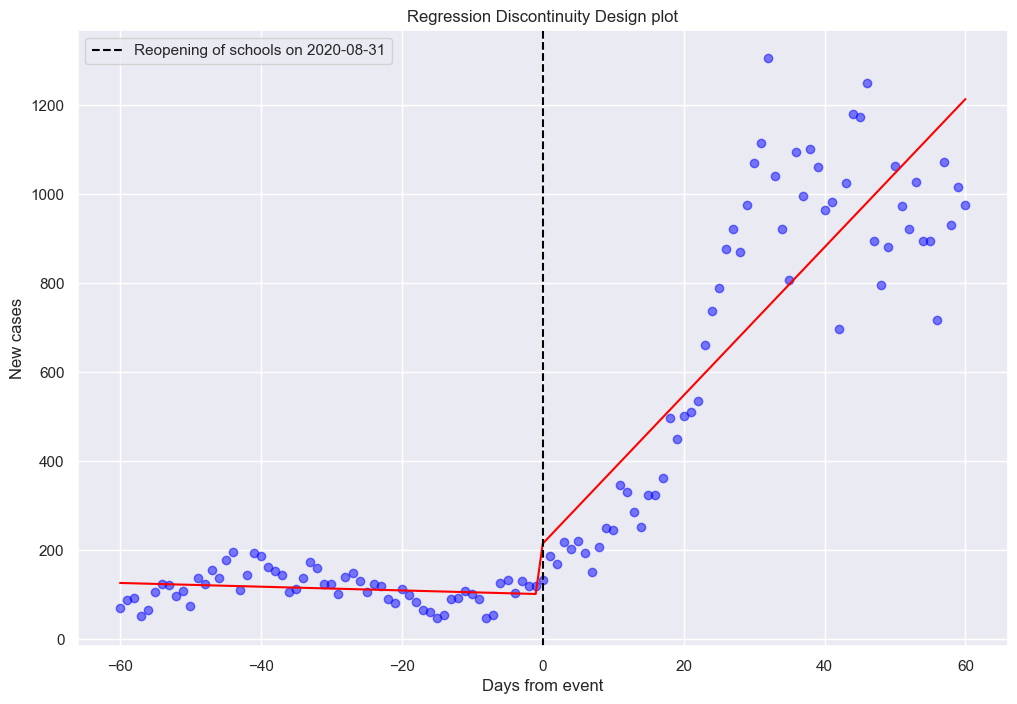

In [26]:
# Plot RDD
plt.figure(figsize=(12,8))
plt.scatter(data['days_from_lockdown'], data['Nb_Nvx_Cas'], color='blue', alpha=0.5)
plt.plot(data['days_from_lockdown'], model.predict(), color='red')
plt.axvline(x=0, color='black', linestyle='--', label='Reopening of schools on 2020-08-31')  # show lockdown date
plt.xlabel('Days from event')
plt.ylabel('New cases')
plt.title('Regression Discontinuity Design plot')
plt.grid(True)
plt.legend()
plt.show()

### Conclusion

The event we're studing in this question is the reopening of schools on August 31, 2020. We found using a 60 day period before and after the event was the most representative. We also use Regression Discontinuity Design (RDD) to model the results.

The Features we examined were, and their Coefficients:
 - const 
 - days_from_lockdown
 - Cutoff 
 - Interaction

The coefficient obtained from regression model represents the expected change in covid cases for each day. A positive coefficient suggests that covid cases tends to increaseas time increases (slope), while a negative coefficient indicates the opposite. 

Their Coefficients (respectively): 
 - 100.9825 (estimated number of cases the day before the event)
 - -0.4197 (slope of the line before the event)
 - 113.6701 (estimated number of cases added the day after the event)
 - 17.0788 (slope of the line after the event)

The p-value associated with the coefficient measures the statistical significance of this relationship, indicating whether it is likely to be a real association or occurred by chance. A significant p-value suggests that the relationship between the features are statistically meaningful.

Their p-values (respectively): 
 - 0.007
 - 0.690
 - 0.029
 - 0.000

R-squared: The R-squared value of the model is 0.874, indicating that the model explains approx. 87% of the variance in the number of new Covid cases.

In conclusion, using RDD to model the data shows a significant correlation between the reopening of schools during and a subsequent sharp increase in cases. This suggests that reopening schools may have contributed to the spread of the virus. However, other factors, such as community transmission rates, variants, vaccine coverage gaps, adherence to safety measures within schools, could also have played a role in the observed increase in cases. 

## 3rd Event: Lockdown - December 25, 2020

In [27]:
data = df.copy()

# Restrict data to 60 days before and after reopening of schools, August 31, 2020
data['days_from_lockdown'] = pd.to_datetime(data['Date'])
target_date = pd.to_datetime('2020-12-25')
date_before = target_date - pd.DateOffset(days=60)
date_after = target_date + pd.DateOffset(days=60)
data = data[(data['days_from_lockdown'] >= date_before) & (data['days_from_lockdown'] <= date_after)].copy()

# Create 'Cutoff' column indicating if days are after the lockdown
cutoff_date = pd.Timestamp('2020-12-25')
data['days_from_lockdown'] = (data['days_from_lockdown'] - cutoff_date).dt.days
data['Cutoff'] = (data['days_from_lockdown'] >= 0).astype(int)

# Create 'Interaction' column that's the product of 'days_from_lockdown' and 'Cutoff'
data['Interaction'] = data['days_from_lockdown'] * data['Cutoff']

X = data[["days_from_lockdown",'Cutoff', 'Interaction']]
X_poly = X.copy()

model = sm.OLS(data['Nb_Nvx_Cas'], sm.add_constant(X_poly)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     221.8
Date:                Fri, 26 May 2023   Prob (F-statistic):           4.21e-48
Time:                        22:52:02   Log-Likelihood:                -823.83
No. Observations:                 121   AIC:                             1656.
Df Residuals:                     117   BIC:                             1667.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2118.7740     58.261     36.367      0.000    2003.392    2234.156
days_from_lockdown    21.5128      1.661     12.951      0.000      18.223      24.803
Cutoff               508.8151     81.064      6.277      0.000     348.271     669.359
Interaction          -57.5040      2.321    -24.780      0.000     -62.100     -52.908
==============================================================================
Omnibus:                        2.260   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.323   Jarque-Bera (JB):                1.721
Skew:                           0.243   Prob(JB):                        0.423
Kurtosis:                       3.325   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

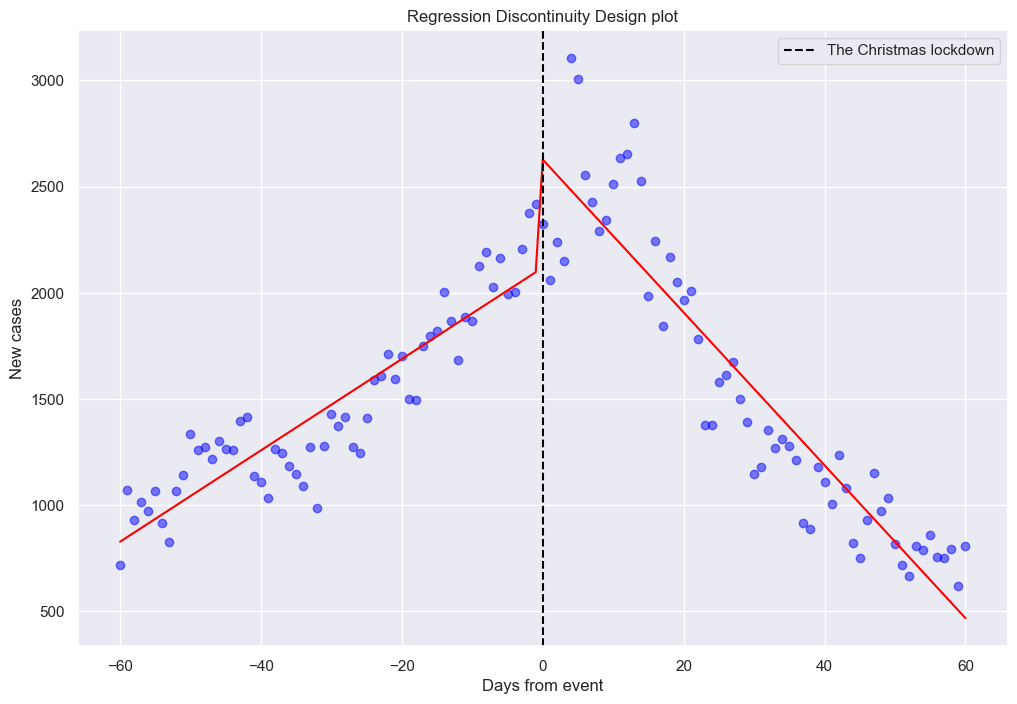

In [28]:
# Plot RDD
plt.figure(figsize=(12,8))
plt.scatter(data['days_from_lockdown'], data['Nb_Nvx_Cas'], color='blue', alpha=0.5)
plt.plot(data['days_from_lockdown'], model.predict(), color='red')
plt.axvline(x=0, color='black', linestyle='--', label='The Christmas lockdown')  # show lockdown date
plt.xlabel('Days from event')
plt.ylabel('New cases')
plt.title('Regression Discontinuity Design plot')
plt.grid(True)
plt.legend()
plt.show()

### Conclusion

This event was the Christmas 2020 lockdown implemented by the Quebec government trying to reduce Covid-19 cases in the province. We want to understand the effect of the lockdown on the number of new Covid-19 cases.
The findings are based on a Regression Discontinuity Design (RDD) analysis. The amount of time included on both sides of the cutoff was also 60 days. We found that too many external events could have an effect in a longer period of time that could affect our model.
#### Coefficients:
1. The intercept term represents the predicted number of new cases the day before of the lockdown. The intercept in this case is 2118 new cases.
2. The coefficient for days from lockdown is 21.51. It indicates the average change in the number of new cases for each additional day before the lockdown.
3. The coefficient for Cutoff is 508.81. It represents the difference in the predicted number of new cases between the period after the lockdown and the period before. It can be explained because just after Christmas there was an outbreak of cases in the province.
4. Interaction: The coefficient for Interaction is -57.50. It indicates the change in the relationship between days from lockdown and the number of new cases after the lockdown. 
After the lockdown, the combined effect of days from lockdown and Interaction suggests a decrease in the growth rate of new cases.
- P-values: Each coefficient (except for the intercept) has a p-value close to zero, suggesting that they are statistically significant predictors to the number of new cases.
- R-squared: The R-squared value is 0.850, indicating that the model explains approx. 85% of the variance in the number of new Covid cases.


In conclusion, the findings suggest that the Christmas lockdown implemented by the government of Quebec on December 25th, 2020, had a significant impact on the number of new cases. The coefficients explained before contribute to explaining the changes in the number of cases. The negative coefficient for Interaction indicates a decrease in the growth rate of new cases after the lockdown compared to the period before.
In summary, the analysis provides evidence of the effectiveness of the 2020 Christmas lockdown in reducing the spread of Covid-19 in the province of Quebec.